# Homwork 2 - marketing strategy
Devising a marketing strategy: You are at a marketing team, and you want to do a target marketing. Using raw data given, you are to process data and using analysis that we have done during the class, try to come up with target marketing:
- For each target group, you can **write a short paragraph** describing their *consuming behavior*, and *how you would conduct* target marketing for each group.
- Within data, there are a lot of info available so whichever data you choose, it is up to you.

Hand in your
1) jupyter notebook file and
2) word file with figures and written descriptions.
(up to 4 pages including everything would be fine)

In [7]:
import pandas as pd
marketing_data = pd.read_csv('marketing/marketing_campaign.csv', sep="\t")
mnt = marketing_data.filter(regex='^Mnt.*')
mnt = pd.concat([marketing_data['ID'], mnt], axis=1)

k-means clustering

In [8]:
from sklearn.cluster import KMeans

kidHome_sweetProducts = pd.DataFrame(
    {'kid home': marketing_data['Kidhome'],
     'sweet products': marketing_data['MntSweetProducts']})

wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, random_state=0)
    kmeans.fit(kidHome_sweetProducts)
    wcss.append(kmeans.inertia_)

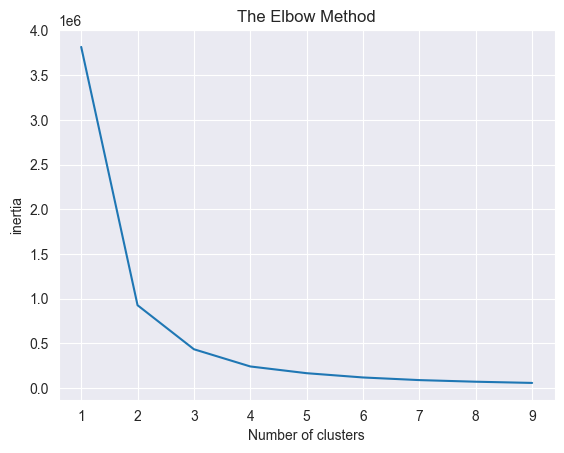

In [9]:
import matplotlib.pyplot as plt

plt.plot(range(1, 10), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("inertia")
plt.show()

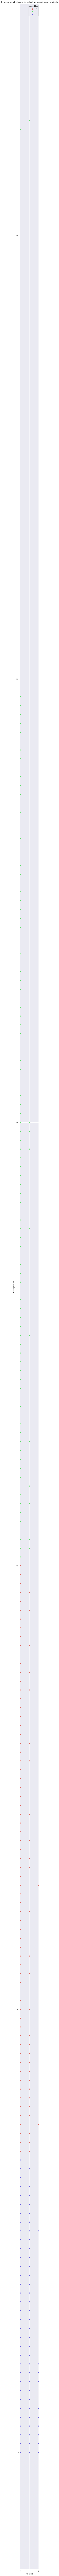

In [10]:
import seaborn as sns

kmeans = KMeans(n_clusters=3).fit(kidHome_sweetProducts)
kidHome_sweetProducts['Something'] = kmeans.labels_
plt.figure(figsize=(kidHome_sweetProducts['kid home'].max(),
                    kidHome_sweetProducts['sweet products'].max()))


sns.scatterplot(x=kidHome_sweetProducts['kid home'],
                y=kidHome_sweetProducts['sweet products'],
                hue=kidHome_sweetProducts['Something'],
                palette=sns.color_palette('hls', 3))
plt.title('k-means with 3 clusters for kids at home and sweet products')
plt.show()

***ToDo look at the REFERENCE.pdf***